In [1]:
# %cd CFY
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import os
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
# from statsmodels.tsa.arima import SARIMAX

In [2]:
torch.cuda.current_device()
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3090'

In [133]:
df = pd.read_csv('HLDYMozu31-cfy.csv', index_col = 'date', parse_dates=True)
cols = df.columns.drop('mozu')
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df = df.loc['2022-05-11 00:00:00':,:]

s = pd.to_datetime('2022-06-10 00:00:00')
e = pd.to_datetime('2022-06-13 23:00:00')
df = df.drop(index=pd.date_range(start=s,end=e,freq='H'))

s = pd.to_datetime('2022-07-17 00:00:00')
e = pd.to_datetime('2022-07-17 23:00:00')
df = df.drop(index=pd.date_range(start=s,end=e,freq='H'))

s = pd.to_datetime('2022-07-19 00:00:00')
e = pd.to_datetime('2022-07-25 23:00:00')
df = df.drop(index=pd.date_range(start=s,end=e,freq='H'))

s = pd.to_datetime('2022-08-03 00:00:00')
e = pd.to_datetime('2022-08-04 23:00:00')
df = df.drop(index=pd.date_range(start=s,end=e,freq='H'))

s = pd.to_datetime('2022-08-07 00:00:00')
e = pd.to_datetime('2022-08-09 23:00:00')
df = df.drop(index=pd.date_range(start=s,end=e,freq='H'))

s = pd.to_datetime('2022-08-21 00:00:00')
e = pd.to_datetime('2022-08-25 23:00:00')
df = df.drop(index=pd.date_range(start=s,end=e,freq='H'))

# AC_Power DryTemp WetTemp Humidity
i = np.where(df['DryTemp'].isnull())[0]
print(i)
df.to_csv('HLDYMozu31-cfy1.csv')
# t = i[0]
# print(df['WetTemp'][t-10:t+10])
# print(df)

# s = pd.to_datetime('2022-01-01 00:00:00')
# e = pd.to_datetime('2022-12-31 23:00:00')
# pd.date_range(start=s,end=e,freq='H').difference(df.index)

# temp = df.loc['2022-03-25 03:00':'2022-03-25 13:00',:]
# temp = temp.drop(columns=['mozu'])
# print(temp)
# for col in temp.columns:
#     temp[col] = pd.to_numeric(temp[col])
# print(temp.describe())

[]


Fill in
--

In [125]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
model = ExponentialSmoothing(df['WetTemp'][0:t], seasonal_periods=24, trend='add', seasonal='add')
# forecast = model.fit().predict(start='2022-07-20 18:00',end='2022-07-25 10:00')
forecast = model.fit().forecast(steps=30)
print(forecast)
# print(df['AC_Power'][1555:1600])
# df['AC_Power'][1560:1594] = forecast.values


/home/server_311/miniconda3/envs/cfyML/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


4526   -1.316797
4527   -1.334760
4528   -1.326677
4529   -1.437471
4530   -1.708151
4531   -2.037175
4532   -2.310255
4533   -2.627311
4534   -2.923882
4535   -3.215926
4536   -3.532027
4537   -3.797827
4538   -4.083780
4539   -4.307432
4540   -4.556097
4541   -4.772849
4542   -4.833936
4543   -4.529807
4544   -4.005888
4545   -3.364385
4546   -2.699535
4547   -2.200374
4548   -1.791269
4549   -1.433664
4550   -1.380461
4551   -1.398424
4552   -1.390341
4553   -1.501135
4554   -1.771815
4555   -2.100840
dtype: float64


/home/server_311/miniconda3/envs/cfyML/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/server_311/miniconda3/envs/cfyML/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [71]:
temp =  pd.read_csv('HLDYMozu31.csv', index_col = 'date', parse_dates=True)
temp.loc['2022-07-19 00:00:00':'2022-07-20 09:00:00','AC_Power'] = forecast.values
temp.to_csv('HLDYMozu31-cfy.csv')

try
--

date
2022-05-11 00:00:00   -34.522917
2022-05-11 01:00:00   -30.582917
2022-05-11 02:00:00   -34.072917
2022-05-11 03:00:00   -17.062917
2022-05-11 04:00:00   -27.622917
                         ...    
2022-12-31 19:00:00    -4.315000
2022-12-31 20:00:00     9.015000
2022-12-31 21:00:00   -27.265000
2022-12-31 22:00:00   -20.065000
2022-12-31 23:00:00    -4.925000
Name: detrend, Length: 5640, dtype: float64


<Axes: xlabel='date'>

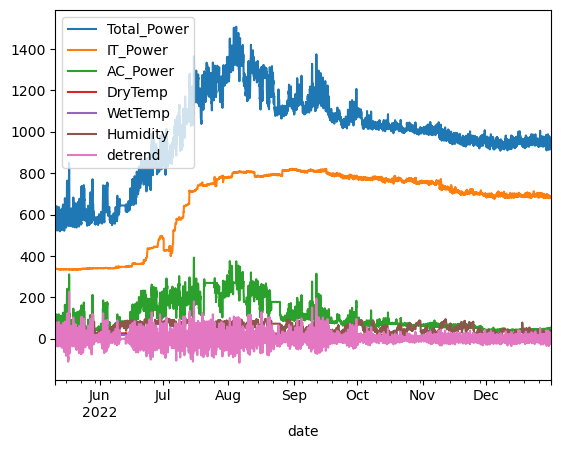

In [88]:

# df['diff1'] = df.Total_Power.diff()
# df.plot()

df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

decompose = seasonal_decompose(df['Total_Power'], model='additive')
trend = decompose.trend.fillna(method='ffill')
trend = trend.fillna(method='bfill')
# print(trend)
df['detrend'] = df['Total_Power'] - trend
# decompose.plot()
print(df['detrend'])
# plt.show()
df.plot()

In [61]:
time_window=48

# 
df['AC_Power'] = df['AC_Power'].fillna(method='ffill')
df['AC_Power'] = df['AC_Power'].fillna(method='bfill')
df['AC_Power'].isna().sum()

# SARIMA_res1 = sm.tsa.SARIMAX(df['Total_Power'],order=(7,1,1),seasonal_order=(1,1,1,24)).fit()


0

In [62]:
pred = SARIMA_res1.predict(start='2022-01-01',end='2022-12-31')
df['SARIMA'] = pred
pred.plot()

NameError: name 'SARIMA_res1' is not defined

In [ ]:
# add a column ARIMA, the result of ARIMA predict 


import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 5)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=100, freq='H'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
#             try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.aic])
                print('SARIMAX {} x {}12 : aIC Calculated ={}'.format(comb, combs, output.aic))
#             except:
#                 continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
a = df['Total_Power']
print(a.index.freq)
sarimax_gridsearch(a, pdq, pdqs, freq='H')

None
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.55336D+00    |proj g|=  7.44294D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   7.443D-08   8.553D+00
  F =   8.5533615870308246     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (0, 0, 0, 24)12 : aIC Calculated =149856.89500478006


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.23679D+00    |proj g|=  2.54507D-01


 This problem is unconstrained.



At iterate    5    f=  8.16796D+00    |proj g|=  3.71834D-02

At iterate   10    f=  8.16780D+00    |proj g|=  1.27416D-02

At iterate   15    f=  8.15815D+00    |proj g|=  4.70686D-01

At iterate   20    f=  7.86717D+00    |proj g|=  3.16660D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     46      1     0     0   7.567D-06   7.867D+00
  F =   7.8671337684355942     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (0, 0, 1, 24)12 : aIC Calculated =137836.1836229916
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =   

 This problem is unconstrained.



At iterate    5    f=  8.06502D+00    |proj g|=  2.25566D-02

At iterate   10    f=  8.06351D+00    |proj g|=  7.15668D-04

At iterate   15    f=  8.06277D+00    |proj g|=  1.55449D-02

At iterate   20    f=  7.48708D+00    |proj g|=  5.92632D-01

At iterate   25    f=  7.32165D+00    |proj g|=  2.90968D-01

At iterate   30    f=  7.31147D+00    |proj g|=  9.81069D-03

At iterate   35    f=  7.31114D+00    |proj g|=  6.94303D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     55      1     0     0   8.274D-05   7.311D+00
  F =   7.3111415666809867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  8.02080D+00    |proj g|=  3.37411D-02

At iterate   10    f=  8.01988D+00    |proj g|=  7.50195D-04

At iterate   15    f=  8.01927D+00    |proj g|=  3.32970D-02

At iterate   20    f=  8.00907D+00    |proj g|=  4.87797D-02

At iterate   25    f=  7.97766D+00    |proj g|=  1.21278D-01

At iterate   30    f=  7.26721D+00    |proj g|=  2.26166D-01

At iterate   35    f=  6.96475D+00    |proj g|=  5.10452D-01

At iterate   40    f=  6.90267D+00    |proj g|=  2.05931D-01

At iterate   45    f=  6.87538D+00    |proj g|=  7.18757D-02

At iterate   50    f=  6.87405D+00    |proj g|=  3.22312D-02

At iterate   55    f=  6.87400D+00    |proj g|=  1.15875D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03990D+00    |proj g|=  4.22400D-02

At iterate    5    f=  7.99500D+00    |proj g|=  1.45477D-02

At iterate   10    f=  7.99250D+00    |proj g|=  8.15541D-04

At iterate   15    f=  7.98929D+00    |proj g|=  3.74357D-02

At iterate   20    f=  7.54872D+00    |proj g|=  8.28321D-01

At iterate   25    f=  6.82629D+00    |proj g|=  5.83065D-01

At iterate   30    f=  6.63688D+00    |proj g|=  1.25897D-01

At iterate   35    f=  6.62828D+00    |proj g|=  3.82972D-02

At iterate   40    f=  6.62796D+00    |proj g|=  3.96006D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


SARIMAX (0, 0, 0) x (0, 1, 0, 24)12 : aIC Calculated =92250.43920032367


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27460D+00    |proj g|=  2.47920D-01

At iterate    5    f=  5.24786D+00    |proj g|=  5.63675D-04

At iterate   10    f=  5.24782D+00    |proj g|=  2.82698D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     15      1     0     0   5.529D-06   5.248D+00
  F =   5.2478194114249241     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (0, 1, 1, 24)12 : aIC Calculated =91945.7960881646

 This problem is unconstrained.



At iterate    5    f=  5.23174D+00    |proj g|=  2.76632D-04

At iterate   10    f=  5.23172D+00    |proj g|=  1.24557D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   8.929D-07   5.232D+00
  F =   5.2317182456455740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (0, 1, 2, 24)12 : aIC Calculated =91665.70366371046


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28981D+00    |proj g|=  5.24015D-01

At iterate    5    f=  5.21842D+00    |proj g|=  5.23861D-04

At iterate   10    f=  5.21842D+00    |proj g|=  4.08209D-04

At iterate   15    f=  5.21841D+00    |proj g|=  2.87868D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     19      1     0     0   5.476D-06   5.218D+00
  F =   5.2184147317399825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX 

 This problem is unconstrained.



At iterate    5    f=  5.20487D+00    |proj g|=  4.14952D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     11      1     0     0   1.074D-05   5.205D+00
  F =   5.2048627216272525     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (0, 1, 4, 24)12 : aIC Calculated =91199.19488290946


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63633D+00    |proj g|=  7.99757D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.847D-08   5.636D+00
  F =   5.6363263595857473     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (0, 2, 0, 24)12 : aIC Calculated =98750.4378199423
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0   

 This problem is unconstrained.



At iterate    5    f=  5.31211D+00    |proj g|=  6.86349D-03

At iterate   10    f=  5.31157D+00    |proj g|=  1.72720D-01

At iterate   15    f=  5.26329D+00    |proj g|=  3.35155D-01

At iterate   20    f=  5.24253D+00    |proj g|=  1.02360D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     33      1     0     0   3.657D-06   5.242D+00
  F =   5.2420946525543188     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (0, 2, 1, 24)12 : aIC Calculated =91845.49831275166


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32085D+00    |proj g|=  6.16338D-01

At iterate    5    f=  5.29837D+00    |proj g|=  6.28858D-02

At iterate   10    f=  5.29781D+00    |proj g|=  6.10698D-02

At iterate   15    f=  5.29744D+00    |proj g|=  7.44769D-02

At iterate   20    f=  5.29327D+00    |proj g|=  1.99190D-01

At iterate   25    f=  5.22731D+00    |proj g|=  2.17593D-01

At iterate   30    f=  5.22343D+00    |proj g|=  4.11211D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.35635D+00    |proj g|=  5.85272D-01

At iterate    5    f=  5.28626D+00    |proj g|=  4.34483D-02

At iterate   10    f=  5.28365D+00    |proj g|=  4.76204D-02

At iterate   15    f=  5.28207D+00    |proj g|=  1.42371D-02

At iterate   20    f=  5.28175D+00    |proj g|=  7.27478D-03

At iterate   25    f=  5.25733D+00    |proj g|=  2.96874D-01

At iterate   30    f=  5.20917D+00    |proj g|=  2.46739D-01

At iterate   35    f=  5.20676D+00    |proj g|=  1.61722D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [64]:
X, y = df[['detrend']].values, df['detrend'].values
# X, y = df.loc[:'2022-06-01','Total_Power'].values, df.loc[:'2022-06-01','Total_Power'].values


X.shape, y.shape

((8760, 1), (8760,))

In [65]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_trans = ss.fit_transform(X)
y_trans = mm.fit_transform(y.reshape(-1, 1))

used_for_inverse_diff = y_trans[46:49]

X_trans, y_trans


(array([[ 0.11080925],
        [-0.44024172],
        [-1.19248098],
        ...,
        [ 1.06490457],
        [ 0.97527956],
        [ 0.53973286]]),
 array([[0.50530267],
        [0.40789306],
        [0.27491928],
        ...,
        [0.67395867],
        [0.6581156 ],
        [0.58112376]]))

In [66]:

# split a multivariate sequence past, future samples (X and y)
def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out):
    X, y = list(), list() # instantiate X and y
    for i in range(len(input_sequences)):

        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out 

        # if (i in discard_indices):
        #     continue
        # if ((out_end_ix) in discard_indices):
        #     continue 

        # check if we are beyond the dataset
        if out_end_ix > len(input_sequences): break
        # gather input and output of the pattern
        seq_x, seq_y = input_sequences[i:end_ix], output_sequence[end_ix:out_end_ix, -1]
        # print(seq_x,seq_y)
        X.append(seq_x), y.append(seq_y)
    return np.array(X), np.array(y)

X_ss, y_mm = split_sequences(X_trans, y_trans, time_window, 1)
# X_ss[0][40:49], y_mm
X_ss.shape

(8712, 48, 1)

In [67]:
# use 0.8 of data to train
train_size = int(len(y_mm) * 0.8)
# other data used to test
test_size = len(y_mm) - train_size


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device=torch.device('cpu')

# print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

X_all = Variable(torch.Tensor(X_ss)).to(device)
X_train =  Variable(torch.Tensor(X_ss[:train_size])).to(device)
X_test =  Variable(torch.Tensor(X_ss[train_size:])).to(device)

y_train =  Variable(torch.Tensor(y_mm[:train_size])).to(device)
y_test =  Variable(torch.Tensor(y_mm[train_size:])).to(device)
y_all = Variable(torch.Tensor(y_mm)).to(device)



X_all.shape,y_all.shape

NVIDIA GeForce RTX 3090


(torch.Size([8712, 48, 1]), torch.Size([8712, 1]))

In [68]:
class LSTM(nn.Module):
    
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.num_classes = num_classes # output size
        self.num_layers = num_layers # number of recurrent layers in the lstm
        self.input_size = input_size # input size
        self.hidden_size = hidden_size # neurons in each lstm layer
        # LSTM model
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=0.2) # lstm
        self.fc = nn.Linear(hidden_size,num_classes)
        self.fc_1 =  nn.Linear(hidden_size, 64) # fully connected 1
        self.fc_2 = nn.Linear(64, num_classes) # fully connected 2
        self.relu = nn.ReLU()
        
    def forward(self,x):
        # hidden state
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device)
        # cell state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device)
        # propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # (input, hidden, and internal state)
        hn = hn[-1,:,:].view(-1, self.hidden_size) # reshaping the data for Dense layer next
        out = self.relu(hn)
#         out = self.fc_1(out) # first dense
#         out = self.relu(out) # relu
#         out = self.fc_2(out) # final output
        out = self.fc(out)
        return out

In [69]:
def training_loop(n_epochs, lstm, optimiser, loss_fn, X_train, y_train,
                  X_test, y_test):
    for epoch in range(n_epochs):
        lstm.train()
        outputs = lstm.forward(X_train) # forward pass
        optimiser.zero_grad() # calculate the gradient, manually setting to 0
        # obtain the loss function
        loss = loss_fn(outputs, y_train)
        loss.backward() # calculates the loss of the loss function
        optimiser.step() # improve from loss, i.e backprop
        # test loss
        lstm.eval()
        test_preds = lstm(X_test)
        test_loss = loss_fn(test_preds, y_test)
        if epoch % 100 == 0:
            print("Epoch: %d, train loss: %1.5f, test loss: %1.5f" % (epoch, 
                                                                      loss.item(), 
                                                                      test_loss.item())) 

In [73]:
import warnings
warnings.filterwarnings('ignore')

n_epochs = 1000 # 1000 epochs
learning_rate = 0.001 # 0.001 lr

input_size = 1 # number of features
hidden_size = 256 # number of features in hidden state
num_layers = 3 # number of stacked lstm layers

num_classes = 1 # number of output classes 

lstm = LSTM(num_classes, 
              input_size, 
              hidden_size, 
              num_layers).to(device)

loss_fn = torch.nn.MSELoss()    # mean-squared error for regression
optimiser = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

training_loop(n_epochs=n_epochs,
              lstm=lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              X_train=X_train,
              y_train=y_train,
              X_test=X_test,
              y_test=y_test)

# detrend num_layer = 3, train loss = 0.002, test loss= 0.0020
# total_poewr num_layer = 3, train loss = , test loss = 0.2
# detrend num_layer = 6, train loss = , test loss = 

# using feature total and ac, hidden_size=256, hidden_layer_num=3, train loss = 0.002, test loss = 0.00185
# using feature total and ac, hidden_size=512, hidden_layer_num=3, train loss = 0.002, test loss = 0.00197

# total+ac+sarima, hidden_size=256, hidden_lay_num = 3, train_loss =0.00178 , test_loss = 0.00187

Epoch: 0, train loss: 0.28485, test loss: 0.20660
Epoch: 100, train loss: 0.00250, test loss: 0.00127
Epoch: 200, train loss: 0.00135, test loss: 0.00071
Epoch: 300, train loss: 0.00107, test loss: 0.00063
Epoch: 400, train loss: 0.00093, test loss: 0.00055
Epoch: 500, train loss: 0.00085, test loss: 0.00050
Epoch: 600, train loss: 0.00083, test loss: 0.00048
Epoch: 700, train loss: 0.00082, test loss: 0.00054
Epoch: 800, train loss: 0.00078, test loss: 0.00047
Epoch: 900, train loss: 0.00077, test loss: 0.00043


Save Model
--

In [ ]:
torch.save(lstm.state_dict())

Visualization
--

In [29]:
from torchviz import make_dot

make_dot(yhat, params=dict(list(model.named_parameters()))).render("rnn_torchviz", format="png")

NameError: name 'yhat' is not defined

detrend test
--

torch.Size([8712, 1])
(8712, 1)


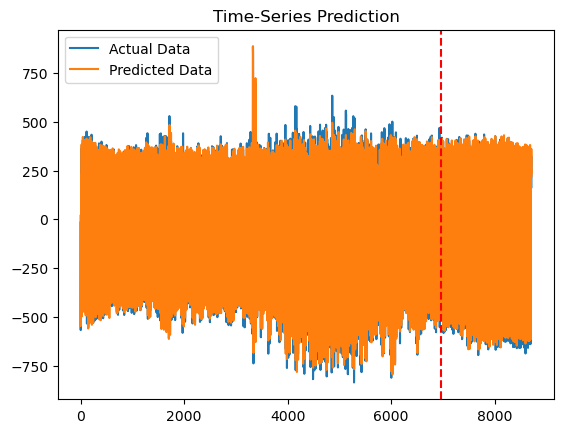

In [74]:
# %matplotlib qt
# %matplotlib widget

y_predict = lstm(X_all) # forward pass
print(y_predict.shape)
y_predict = torch.Tensor.cpu(y_predict).data.numpy() # numpy conversion
y_origin = torch.Tensor.cpu(y_all).data.numpy()
print(y_origin.shape)

y_predict = mm.inverse_transform(y_predict) # reverse transformation
y_origin = mm.inverse_transform(y_origin)
true, preds = [], []

plt.plot(y_origin, label='Actual Data') # actual plot
plt.plot(y_predict, label='Predicted Data') # predicted plot
plt.axvline(x=train_size, c='r', linestyle='--')
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("whole_plot.png", dpi=300)
plt.show() 

retrend test
--

training RMSE 0.044864513 testing RMSE 0.046002995
[[-3.229145  ]
 [-1.9434239 ]
 [-0.27228132]
 ...
 [10.041345  ]
 [13.170722  ]
 [-1.2059636 ]]
[[ -3.4083285]
 [ 20.383125 ]
 [  1.8852103]
 ...
 [ 43.38687  ]
 [  3.4068747]
 [-12.32312  ]]


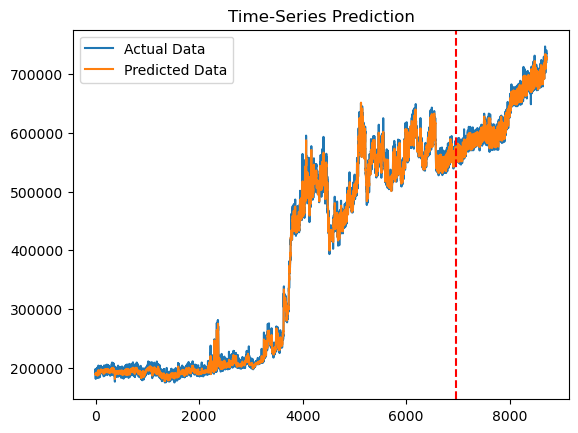

In [24]:
%matplotlib inline
from sklearn.metrics import mean_squared_error

y_predict = torch.Tensor.cpu(lstm(X_all)) # forward pass
y_predict = y_predict.data.numpy() # numpy conversion
print('training RMSE',mean_squared_error(torch.Tensor.cpu(y_all).data.numpy()[:train_size], y_predict[:train_size], squared=False),'testing RMSE',mean_squared_error(torch.Tensor.cpu(y_all).data.numpy()[train_size:], y_predict[train_size:], squared=False))
y_predict = mm.inverse_transform(y_predict) # reverse transformation
print(y_predict)
y_predict = y_predict + trend.values.reshape(-1,1)[48:]
y_origin = torch.Tensor.cpu(y_all).data.numpy()
y_origin = mm.inverse_transform(y_origin)
print(y_origin)
y_origin = y_origin + trend.values.reshape(-1,1)[48:]

y_predict = mm.inverse_transform(y_predict) # reverse transformation
y_origin = mm.inverse_transform(y_origin)




plt.plot(y_origin, label='Actual Data') # actual plot
plt.plot(y_predict, label='Predicted Data') # predicted plot
plt.axvline(x=train_size, c='r', linestyle='--')
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("whole_plot.png", dpi=300)
plt.show() 